In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Dropout, Flatten
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.ndimage import convolve
import math
import keras
from keras.models import Sequential
from sklearn.metrics import accuracy_score,precision_score

Using TensorFlow backend.


In [2]:
in_shape = (4, 4, 64)

in_img = Input(shape = in_shape)


x = Conv2D(32, (3, 3), activation='relu', padding='same')(in_img)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding= 'same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)



print("shape of decoded : ", K.int_shape(decoded))

Instructions for updating:
Colocations handled automatically by placer.
shape of decoded :  (None, 28, 28, 1)


In [3]:
def get_rd_imgs(n_img, y, shape):
  rand_imgs = np.array([np.random.uniform(y[i]*10, (y[i]+1)*10, shape) for i in range(n_img)])
  return rand_imgs

In [4]:
batch_size = 128
num_classes = 10
epochs = 15
dec = Model(in_img, decoded)
dec.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

rand_X_train = get_rd_imgs(X_train.shape[0], Y_train, in_shape)
rand_X_train = rand_X_train.astype('float32') / 255.

rand_X_test = get_rd_imgs(X_test.shape[0], Y_test, in_shape)
rand_X_test = rand_X_test.astype('float32') / 255.


X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))    
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))  

dec.fit(rand_X_train, X_train, epochs = 15, batch_size=128, shuffle=True, validation_data=(rand_X_test, X_test),
                callbacks=[TensorBoard(log_dir='conv_autoencoder')], verbose=2)

dec_imgs = dec.predict(rand_X_test)

11493376/11490434 [==============================] - 1s 0us/step
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 - 4s - loss: 0.2830 - val_loss: 0.2595
Epoch 2/15
 - 2s - loss: 0.2535 - val_loss: 0.2486
Epoch 3/15
 - 2s - loss: 0.2482 - val_loss: 0.2458
Epoch 4/15
 - 2s - loss: 0.2450 - val_loss: 0.2414
Epoch 5/15
 - 2s - loss: 0.2427 - val_loss: 0.2408
Epoch 6/15
 - 2s - loss: 0.2412 - val_loss: 0.2395
Epoch 7/15
 - 2s - loss: 0.2399 - val_loss: 0.2428
Epoch 8/15
 - 2s - loss: 0.2388 - val_loss: 0.2380
Epoch 9/15
 - 2s - loss: 0.2377 - val_loss: 0.2360
Epoch 10/15
 - 2s - loss: 0.2366 - val_loss: 0.2334
Epoch 11/15
 - 2s - loss: 0.2359 - val_loss: 0.2373
Epoch 12/15
 - 2s - loss: 0.2353 - val_loss: 0.2317
Epoch 13/15
 - 2s - loss: 0.2346 - val_loss: 0.2317
Epoch 14/15
 - 2s - loss: 0.2339 - val_loss: 0.2314
Epoch 15/15
 - 2s - loss: 0.2335 - val_loss: 0.2304


In [ ]:
print (dec.summary())

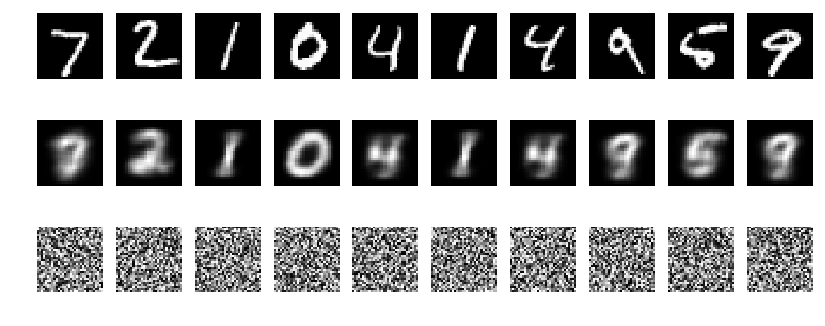

In [5]:

n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

    # display reconstruction
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(dec_imgs[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()
    
    
    # noise test image
    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(rand_X_test[i].reshape(32, 32))
    plt.gray()
    ax.set_axis_off()

plt.show()